In [1]:
from datetime import datetime
from pandas import read_table, DataFrame
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import ttide
from ttide.t_tide import t_tide
from ttide import t_predic



In [2]:
obs = pd.read_csv('Datos_Valparaiso.txt',delimiter="\t")
obs.head()

,Time (UTC),prs(m),rad(m)
0,2019-09-01 00:00:28,2.015,3.319
1,2019-09-01 00:01:28,2.020,3.321
2,2019-09-01 00:02:29,2.080,3.332
3,2019-09-01 00:03:28,1.971,3.347
4,2019-09-01 00:04:28,2.005,3.335


## Codigo para cambiar estilo de fecha columnas separadas.

In [3]:
#dtime = []
#for i in range (len(obs)):
#    year = obs['year'][i]
#    month = obs['month'][i]
#    day = obs['day'][i]
#    hour = obs['hour'][i]
#    minu = obs['min'][i]
#    dt = datetime(year, month,day, hour,minu)
#    dt = pd.to_datetime(dt)
#    dtime.append(dt)
    
#obs['datetime']=dtime


## Convertir fecha a formato datetime

In [4]:
obs['datetime']= pd.to_datetime(obs["Time (UTC)"])
indexobs = obs["datetime"]
elev = list(obs["prs(m)"])
obs = pd.DataFrame(data = {'elev':elev}, index= indexobs)

In [5]:
obs

,elev
datetime,
2019-09-01 00:00:28,2.015
2019-09-01 00:01:28,2.020
2019-09-01 00:02:29,2.080
2019-09-01 00:03:28,1.971
2019-09-01 00:04:28,2.005
...,...
2019-09-30 23:55:27,2.016
2019-09-30 23:56:27,1.918
2019-09-30 23:57:27,2.095


## Se seleccionara el mes de octubre de los registros para ser usados por ttide.

In [6]:
#obs = obs['2018-10']

promedios horarios

In [7]:
obs = obs.resample('H').mean()

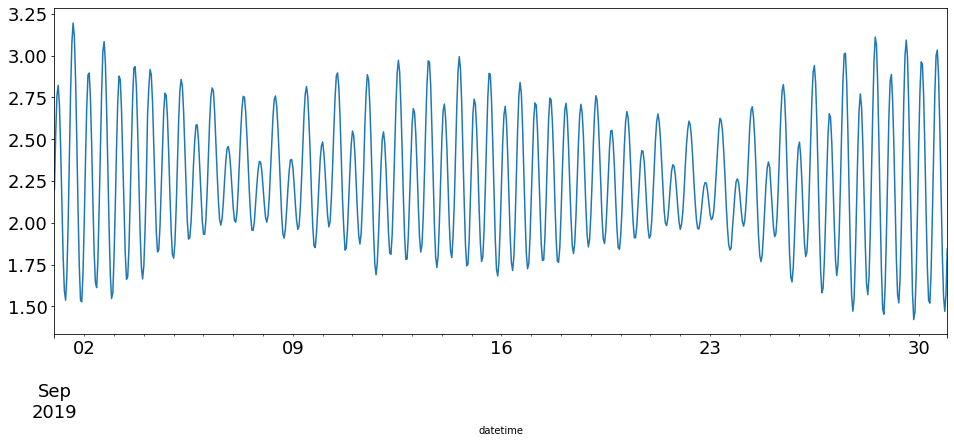

In [52]:
fig, ax = plt.subplots(figsize=(16, 6))
plt.rc('xtick', labelsize=20) 
plt.rc('ytick', labelsize=18)
obs.loc['2019-09':'2019-09', 'elev'].plot()
plt.show()

In [9]:
obs.describe()

,elev
count,720.000000
mean,2.261882
std,0.377680
min,1.421417
25%,1.966860
50%,2.235233
75%,2.559621
max,3.194150


In [10]:
dti = pd.date_range('2019-11-28', periods=30*24+1, freq='2T')
dti = dti.tolist()
dti = np.array(dti)

dti2 = obs.index.tolist()
dti2 = np.array(dti2)

In [11]:
LatV = -33.02730833
out_tide_V= t_tide(obs['elev'], dt=1,stime=dti2[0] ,lat=LatV)

-----------------------------------
nobs = 720 
ngood = 719 
record length (days) = 30.00
start time: 2019-09-01 00:00:00
rayleigh criterion = 1.0

Greenwich phase computed with nodal
                   corrections applied to amplitude
                   and phase relative to center time

x0= 2.26  xtrend= 0
var(data)= 0.14    var(prediction)= 0.14    var(residual)= 0.00
var(prediction)/var(data) (%) = 96.8

        tidal amplitude and phase with 95 % CI estimates
 tide      freq        amp      amp_err   pha      pha_err    snr
  MSF   0.0028219     0.0151     0.038     85.93    174.96      0.16
  2Q1   0.0357064     0.0031     0.005    279.51    104.45      0.41
* Q1    0.0372185     0.0224     0.006    320.45     16.01        13
* O1    0.0387307     0.0958     0.006    347.54      3.57   2.4e+02
* NO1   0.0402686     0.0189     0.005    357.93     16.54        14
* K1    0.0417807     0.1170     0.006     44.65      3.09   3.6e+02
  J1    0.0432929     0.0059     0.005     55.49   

/home/lenovio/Tarea4_maritima/ttide/t_tide.py:295: FutureWarning: `rcond` parameter will change to the default of machine precision times ``max(M, N)`` where M and N are the input matrix dimensions.
To use the future default and silence this warning we advise to pass `rcond=None`, to keep using the old, explicitly pass `rcond=-1`.
  coef = np.linalg.lstsq(tc[gd, :], xin[gd])[0].T
/home/lenovio/anaconda3/envs/MachineLearning/lib/python3.7/site-packages/numpy/lib/type_check.py:161: FutureWarning: `real` is deprecated and will be removed in a future version. To eliminate this warning for a Series `ser`, use `np.real(ser.to_numpy())` or `ser.to_numpy().real`.
  return val.real
/home/lenovio/anaconda3/envs/MachineLearning/lib/python3.7/site-packages/numpy/lib/type_check.py:204: FutureWarning: `imag` is deprecated and will be removed in a future version. To eliminate this warning for a Series `ser`, use `np.imag(ser.to_numpy())` or `ser.to_numpy().imag`.
  return val.imag
/home/lenovio/Tarea

In [12]:
valores = out_tide_V['tidecon']
names2 = out_tide_V['nameu']
names = ['MSF', '2Q1', 'Q1', 'O1', 'NO1', 'K1', 'J1', 'OO1',
       'UPS1', 'N2', 'M2', 'S2', 'ETA2', 'MO3', 'M3', 'MK3',
       'SK3', 'MN4', 'M4', 'MS4', 'S4', '2MK5', '2SK5', '2MN6',
       'M6', '2MS6', '2SM6', '3MK7', 'M8']
variables = ['amp','amp-err','pha','pha-err']
freq = out_tide_V['fu']
noise = out_tide_V['snr']

result_tide= pd.DataFrame(data =valores, index = names, columns = variables)
result_tide['freq']= freq
result_tide['snr']= noise

result_tide

,amp,amp-err,pha,pha-err,freq,snr
MSF,0.015138,0.037805,85.927864,174.957987,0.002822,0.160342
2Q1,0.003086,0.004821,279.508187,104.445516,0.035706,0.409779
Q1,0.022373,0.006294,320.448680,16.012569,0.037219,12.637400
O1,0.095817,0.006197,347.541549,3.572751,0.038731,239.064013
NO1,0.018878,0.004968,357.934556,16.540398,0.040269,14.438670
K1,0.116963,0.006177,44.654412,3.089507,0.041781,358.578221
J1,0.005886,0.005490,55.493412,60.857509,0.043293,1.149227
OO1,0.005065,0.004936,129.773194,63.797144,0.044831,1.052724
UPS1,0.006093,0.006537,168.206295,61.620157,0.046343,0.868692
N2,0.110135,0.020084,17.013851,11.233037,0.078999,30.071251


In [13]:
t = np.linspace(720*2+28*24,720*2+29*24 -1,24*30)
a0 = 2.261882 

In [14]:
M2 =  result_tide['amp']['M2']*np.cos(2*np.pi*result_tide['freq']['M2']*t-result_tide['pha']['M2'])
S2 =  result_tide['amp']['S2']*np.cos(2*np.pi*result_tide['freq']['S2']*t-result_tide['pha']['S2'])
K1 =  result_tide['amp']['K1']*np.cos(2*np.pi*result_tide['freq']['K1']*t-result_tide['pha']['K1'])
O1 =  result_tide['amp']['O1']*np.cos(2*np.pi*result_tide['freq']['O1']*t-result_tide['pha']['O1'])
N2 =  result_tide['amp']['N2']*np.cos(2*np.pi*result_tide['freq']['N2']*t-result_tide['pha']['N2'])
M3 =  result_tide['amp']['M3']*np.cos(2*np.pi*result_tide['freq']['M3']*t-result_tide['pha']['M3'])
Q1 =  result_tide['amp']['Q1']*np.cos(2*np.pi*result_tide['freq']['Q1']*t-result_tide['pha']['Q1'])
SK3 = result_tide['amp']['SK3']*np.cos(2*np.pi*result_tide['freq']['SK3']*t-result_tide['pha']['SK3'])


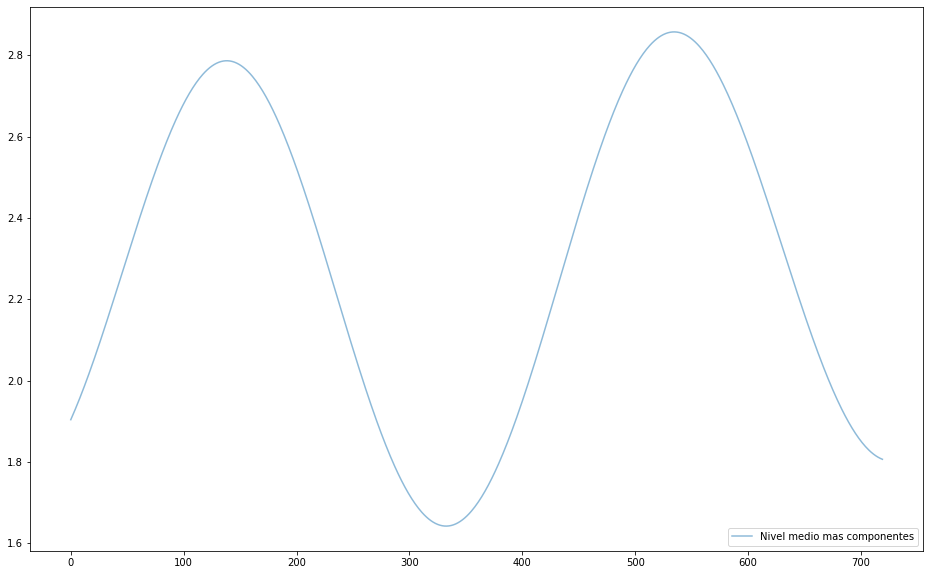

In [15]:
fig, (ax3) = plt.subplots(nrows=1, sharey=True, sharex=True, figsize=(16, 10))


ax3.plot( (M2+S2+K1+O1*N2+M3+Q1+SK3)+a0, alpha=0.5, label=u'Nivel medio mas componentes')
_ = ax3.legend(numpoints=1, loc='lower right')
plt.show()

# Se cargan los registros reales para SA 28 Noviembre, 2019

In [16]:
san_a = pd.read_csv('Datos_SA_28N.txt',delimiter="\t")
san_a['datetime']= pd.to_datetime(san_a["Time (UTC)"])
indexobs = san_a["datetime"]
elev = list(san_a["prs(m)"])
san_a = pd.DataFrame(data = {'elev':elev}, index= indexobs)
san_a = san_a.resample('2T').mean()
san_a.describe()

,elev
count,697.000000
mean,2.093948
std,0.489561
min,1.350500
25%,1.622000
50%,2.045500
75%,2.428000
max,3.013500


## Se cargan los registros reales para Valparaiso 28 Noviembre, 2019

In [17]:
valpo = pd.read_csv('Valparaiso28N.txt',delimiter="\t")
valpo['datetime']= pd.to_datetime(valpo["Time (UTC)"])
indexobs = valpo["datetime"]
elev = list(valpo["prs(m)"])
valpo = pd.DataFrame(data = {'elev':elev}, index= indexobs)
valpo = valpo.resample('2T').mean()
valpo.head()

,elev
datetime,
2019-11-28 00:00:00,2.5390
2019-11-28 00:02:00,2.5855
2019-11-28 00:04:00,2.5910
2019-11-28 00:06:00,2.5735
2019-11-28 00:08:00,2.6070


## Pronostico T_TIDE

In [18]:
t_time  = dti
names = names2
freq = freq
tidecon = valores
pred_valpo = t_predic(t_time,names,freq,tidecon)

# Definición diccionario:
diccionario = {'pred_valpo': pred_valpo}

# Creación DataFrame:
pred_valpo = pd.DataFrame(diccionario,index=t_time)
# Guarda datos en CSV:
pred_valpo.to_csv('Pronostico_Valparaiso28N.csv')

In [19]:
pred2 = t_predic(dti2,names,freq,tidecon)

TypeError: descriptor 'date' requires a 'datetime.datetime' object but received a 'int'

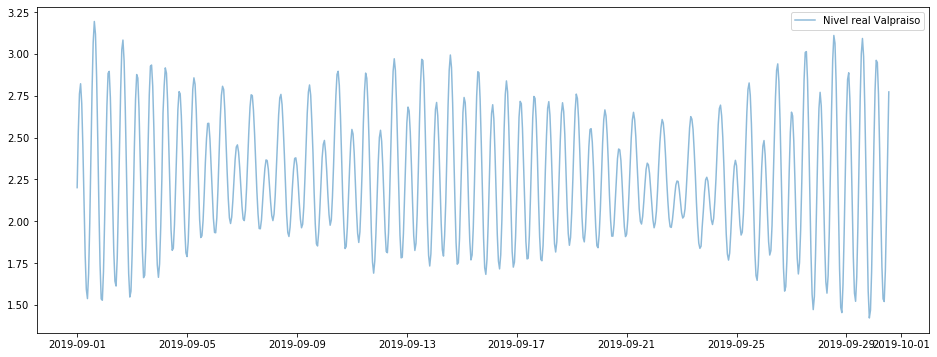

In [35]:
fig, (ax4) = plt.subplots(nrows=1, sharey=True, sharex=True, figsize=(16, 6))

ax4.plot(obs.index[0:710],  obs['elev'][0:710], alpha=0.5, label=u'Nivel real Valpraiso')
_ = ax4.legend(numpoints=1, loc='upper right')
plt.xlim([datetime.date(2019, 9, 1), datetime.date(2019, 9, 30)])
#plt.xticks(rotation='vertical')
plt.show()



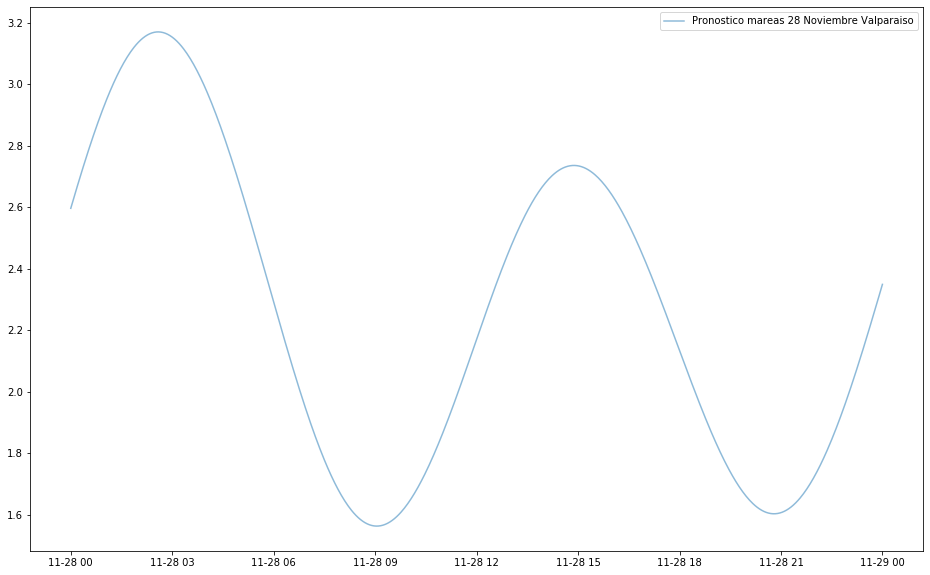

In [21]:
fig, (ax0) = plt.subplots(nrows=1, sharey=True, sharex=True, figsize=(16, 10))

ax0.plot( dti,pred_valpo+a0, alpha=0.5, label=u'Pronostico mareas 28 Noviembre Valparaiso')
_ = ax0.legend(numpoints=1, loc='upper right')
plt.show()

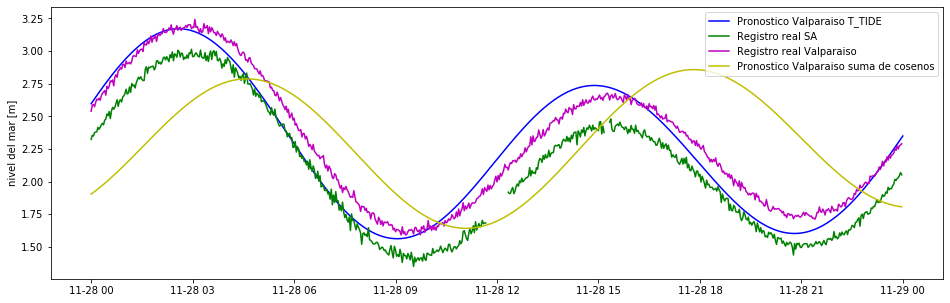

In [22]:
plt.rcParams["figure.figsize"] = [16,5]
plt.plot(dti,pred_valpo+a0,'b',label='Pronostico Valparaiso T_TIDE')
plt.plot(san_a.index,san_a['elev'],'g',label='Registro real SA')
plt.plot(valpo.index,valpo['elev'],'m',label='Registro real Valparaiso')
plt.plot(san_a.index,(M2+S2+K1+O1*N2+M3+Q1+SK3)+a0,'y',label='Pronostico Valparaiso suma de cosenos')

plt.legend(loc='upper right')
plt.ylabel('nivel del mar [m]')
plt.show()

## Cálculo IDW de los pronóstico t_tide

In [23]:
pron_val = pd.read_csv('Pronostico_Valparaiso28N.csv')
pron_buc = pd.read_csv('Pronostico_Bucalemu28N.csv')
pron_IDW = ((pron_val['pred_valpo'])/61.5 + (pron_buc['pred_buca'])/124)/(1/65.5 + 1/124)

In [24]:
NMM_SA=2.093948
NMM = NMM = np.ones(len(dti))*NMM_SA
IDW = list(pron_IDW+NMM_SA)
pron_SA = pd.DataFrame({'pron_IDW':IDW},index=dti)
pron_SA.head()

,pron_IDW
2019-11-28 00:00:00,2.420467
2019-11-28 00:02:00,2.433761
2019-11-28 00:04:00,2.446999
2019-11-28 00:06:00,2.460178
2019-11-28 00:08:00,2.473293


## Identificar Pleamar y Bajamar de la serie

In [25]:
def findpeaks(series, DELTA):
    """
    Finds extrema in a pandas series data.

    Parameters
    ----------
    series : `pandas.Series`
        The data series from which we need to find extrema.

    DELTA : `float`
        The minimum difference between data values that defines a peak.

    Returns
    -------
    minpeaks, maxpeaks : `list`
        Lists consisting of pos, val pairs for both local minima points and
        local maxima points.
    """
    # Set inital values
    mn, mx = np.Inf, -np.Inf
    minpeaks = []
    maxpeaks = []
    lookformax = True
    start = True
    # Iterate over items in series
    for time_pos, value in series.iteritems():
        if value > mx:
            mx = value
            mxpos = time_pos
        if value < mn:
            mn = value
            mnpos = time_pos
        if lookformax:
            if value < mx-DELTA:
                # a local maxima
                maxpeaks.append((mxpos, mx))
                mn = value
                mnpos = time_pos
                lookformax = False
            elif start:
                # a local minima at beginning
                minpeaks.append((mnpos, mn))
                mx = value
                mxpos = time_pos
                start = False
        else:
            if value > mn+DELTA:
                # a local minima
                minpeaks.append((mnpos, mn))
                mx = value
                mxpos = time_pos
                lookformax = True
    # check for extrema at end
    if value > mn+DELTA:
        maxpeaks.append((mxpos, mx))
    elif value < mx-DELTA:
        minpeaks.append((mnpos, mn))
    return minpeaks, maxpeaks

In [26]:
series = pron_SA['pron_IDW']
minpeaks, maxpeaks = findpeaks(series, DELTA=0.7)
print('minpeask :', minpeaks)
print('')
print('maxpeask :', maxpeaks)

minpeask : [(Timestamp('2019-11-28 00:00:00'), 2.4204669569040753), (Timestamp('2019-11-28 09:08:00'), 1.4091811305208308), (Timestamp('2019-11-28 20:48:00'), 1.4531003918803818)]

maxpeask : [(Timestamp('2019-11-28 02:38:00'), 3.04062052078409), (Timestamp('2019-11-28 14:56:00'), 2.5870106395728025), (Timestamp('2019-11-29 00:00:00'), 2.1617977648771642)]


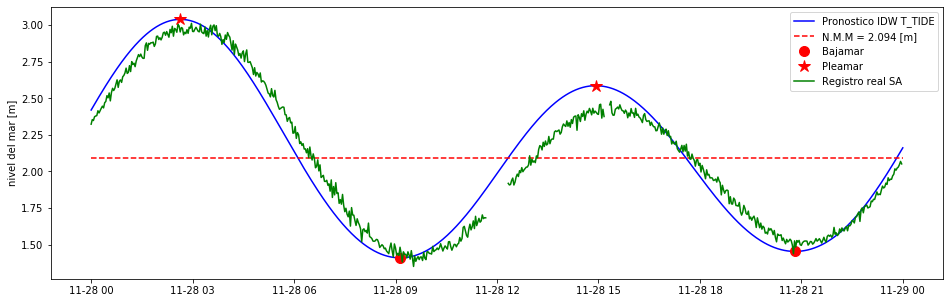

In [27]:
plt.rcParams["figure.figsize"] = [16,5]
plt.plot(dti,pron_IDW+NMM_SA,'b',label='Pronostico IDW T_TIDE')
plt.plot(dti,NMM,'r--',label='N.M.M = 2.094 [m]')
plt.plot([minpeaks[1][0],minpeaks[2][0]],[minpeaks[1][1],minpeaks[2][1]],'ro', ms=10,label = 'Bajamar')
plt.plot([maxpeaks[0][0],maxpeaks[1][0]],[maxpeaks[0][1],maxpeaks[1][1]],'r*', ms=13,label = 'Pleamar')
plt.plot(san_a.index,san_a['elev'],'g',label='Registro real SA')

plt.legend(loc='upper right')
plt.ylabel('nivel del mar [m]')
plt.show()